# Resume Category Prediction using NLP & Machine Learning

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

## Data Visualization

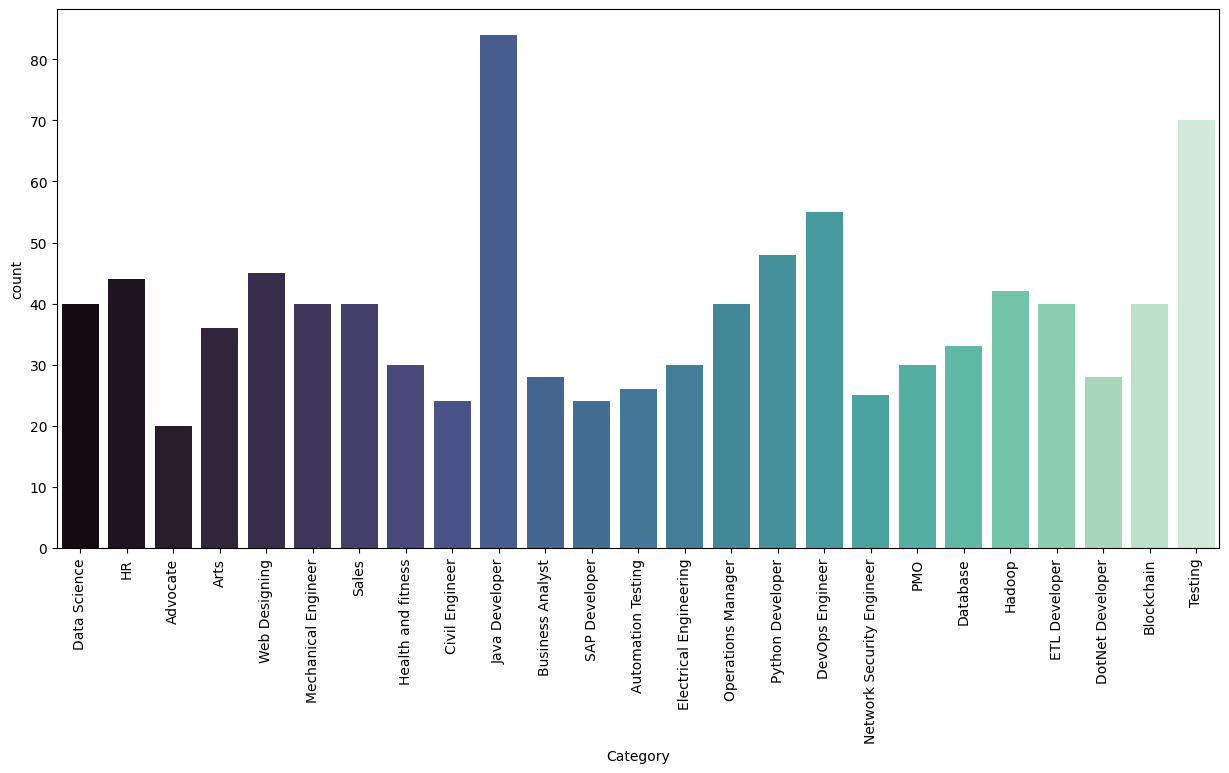

In [5]:
plt.figure(figsize=(15 , 7))
sns.countplot(data=df, x="Category" , palette="mako" , hue="Category" , legend=False)
plt.xticks(rotation=90)
plt.show()

#### Insight

- Most resumes belong to the Java Developer category — showing strong interest in Java-based roles.

In [6]:
counts = df["Category"].value_counts()
print(counts)

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


In [8]:
unique_val = df["Category"].unique()
print(unique_val)

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


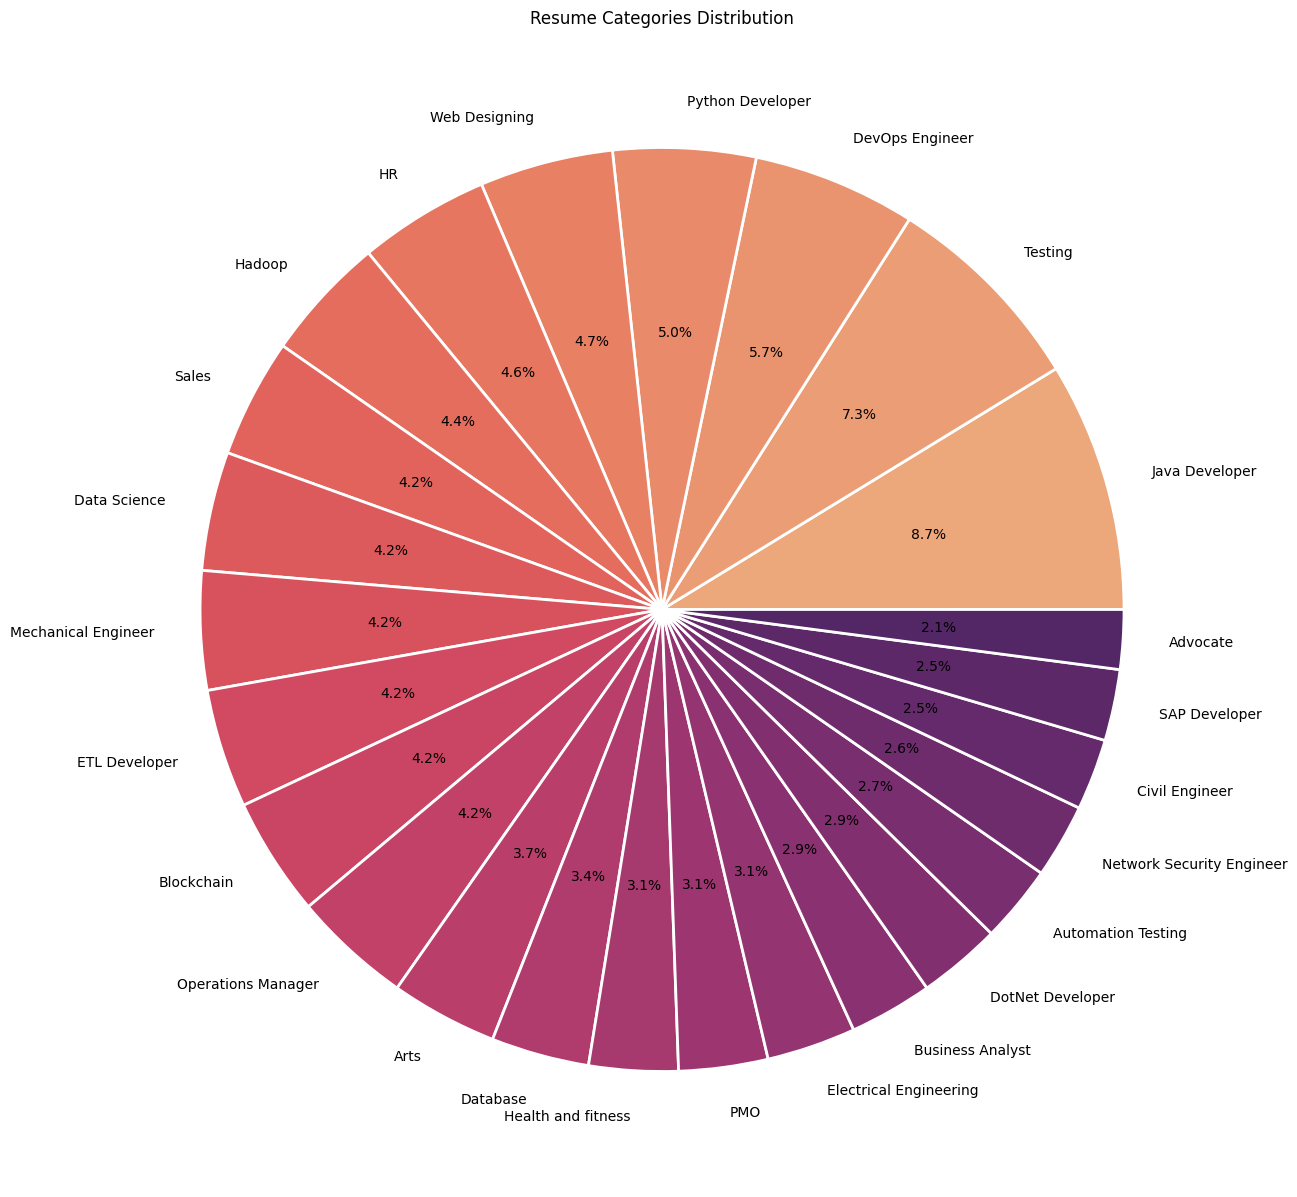

In [9]:
plt.figure(figsize=(20 , 15))
labels= counts.index # to maintain order
sizes = counts.values
colors = sns.color_palette("flare", len(labels))
plt.pie(sizes , labels=labels , colors=colors , autopct="%1.1f%%" , wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title("Resume Categories Distribution")
plt.show()

## Exploring Resume

In [10]:
df["Category"][0]

'Data Science'

In [11]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning Data 

- URLs
- hashtags
- mentions
- special letters
- punctuations

In [12]:
import re

def cleanresume(txt):
    cleanText = re.sub(r'http\S+|www\S+', ' ', txt)
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    cleanText = re.sub(r'#\S+', ' ', cleanText)
    cleanText = re.sub(r'@\S+', ' ', cleanText)
    cleanText = re.sub(r'[%s]' % re.escape("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub(r'\d+', ' ', cleanText)
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()
    cleanText = cleanText.lower()
    return cleanText

In [13]:
df["Resume"] = df["Resume"].apply(lambda x : cleanresume(x))

In [14]:
df["Resume"][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the review proce

## Words into Categorical Values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df["Category"])
df["Category"] = le.transform(df["Category"])
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vactorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

## Splitting

In [17]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(requiredText , df['Category'] , test_size=0.2 , random_state=42)

In [18]:
X_train.shape

(769, 7014)

In [19]:
X_test.shape

(193, 7014)

## Model Selection & Train the Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score 

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train , y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test , ypred))

0.9844559585492227


## Prediction System

In [21]:
import pickle
pickle.dump(tfidf , open('tfidf.pkl' , 'wb'))
pickle.dump(clf , open('clf.pkl' , 'wb'))

print("✅ Model has been successfully saved")

✅ Model has been successfully saved


## Check Prediction

In [22]:
import pickle

clf = pickle.load(open('clf.pkl' , 'rb'))
tfidf = pickle.load(open('tfidf.pkl' , 'rb'))

myresume = """Name: John Smith
Email: john.smith@email.com
Phone: +1 555 234 7890
Location: New York, USA

Professional Summary:
Passionate Java Developer with 2+ years of experience in building scalable backend systems and enterprise applications using Java, Spring Boot, and REST APIs. Strong understanding of object-oriented design and database management.

Technical Skills:
- Programming Languages: Java, Python, SQL
- Frameworks: Spring Boot, Hibernate, Maven
- Databases: MySQL, PostgreSQL
- Tools: Git, IntelliJ IDEA, Docker
- Web Technologies: HTML, CSS, JavaScript

Experience:
Software Developer — Tech Solutions Inc.
Jan 2022 – Present
- Designed and implemented RESTful APIs for employee management system.
- Improved database query performance by 20%.
- Collaborated with frontend team for API integration.

Education:
Bachelor of Computer Science — XYZ University (2020)

Projects:
- Library Management System (Java + MySQL)
- Student Attendance Portal (Spring Boot + REST API)

Certifications:
- Oracle Certified Java Programmer (OCJP)

Hobbies:
Coding, Problem Solving, Reading Tech Blogs"""

cleaned_resume = cleanresume(myresume)
print("Cleaned Resume:", cleaned_resume[:200])

input_features = tfidf.transform([cleaned_resume])
print("Transformed Shape:", input_features.shape)

prediction_id = clf.predict(input_features)[0]
print("Predicted ID:", prediction_id)

category_mapping = {
    15: "Java Developer" , 
    23: "Testing" ,
    8: "DevOps Engineer" ,
    20: "Python Developer" ,
    24: "Web Designing" ,
    12: "HR" ,
    13: "Hadoop" ,
    22: "Sales" ,
    6: "Data Science" ,
    16: "Mechanical Engineer" ,
    10: "ETL Developer" ,
    3: "Blockchain" ,
    18: "Operations Manager" ,
    1: "Arts" ,
    7: "Database" ,
    14: "Health and fitness" ,
    19: "PMO" ,
    11: "Electrical Engineeringr" ,
    4: "Business Analystr" ,
    9: "DotNet Developer" ,
    2: "Automation Testing" ,
    17: "Network Security Engineer" ,
    5: "Civil Engineer" ,
    21: "SAP Developer" ,
    0: "Advocate" ,
}
print("Predicted Category:", category_mapping[prediction_id])

Cleaned Resume: name john smith email john smith phone location new york usa professional summary passionate java developer with years of experience in building scalable backend systems and enterprise applications us
Transformed Shape: (1, 7014)
Predicted ID: 15
Predicted Category: Java Developer
